# Understand problem statement
Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# BASE MODEL

## Explore train data set
* Undestand features,no of examples,types of features,

In [1]:
import pandas as pd

In [2]:
train_data=pd.read_csv('train.csv_VsW9EGx/train.csv')

#import test data set
test_data=pd.read_csv('test.csv_yAFwdy2/test.csv')

In [3]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
# Convert categorical columns
test_data=pd.get_dummies(test_data)
test_data_f=test_data.drop(columns=['id'],axis=1)
test_data_f.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,25,1,11.0,1,35786.0,152.0,53,0,1,0,1,0,1,0
1,40,1,28.0,0,33762.0,7.0,111,0,1,1,0,0,0,1
2,47,1,28.0,0,40050.0,124.0,199,0,1,1,0,0,0,1
3,24,1,27.0,1,37356.0,152.0,187,0,1,0,1,0,0,1
4,27,1,28.0,1,59097.0,152.0,297,0,1,0,1,0,1,0


In [6]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Exploratory Data analysis
### Analyse 'object' type columns 

In [8]:
train_data['Vehicle_Age'][:20]

0     > 2 Years
1      1-2 Year
2     > 2 Years
3      < 1 Year
4      < 1 Year
5      < 1 Year
6      < 1 Year
7      1-2 Year
8      < 1 Year
9      < 1 Year
10     1-2 Year
11     < 1 Year
12     1-2 Year
13     1-2 Year
14     1-2 Year
15     1-2 Year
16     < 1 Year
17     < 1 Year
18     1-2 Year
19     1-2 Year
Name: Vehicle_Age, dtype: object

In [9]:
train_data['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [10]:
train_data.describe(include=['object'])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [11]:
train_data.select_dtypes(include=['object'])

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [12]:
train_data_c=train_data.copy()

### Encode categorical variables

In [13]:
Genders=pd.get_dummies(train_data_c.Gender,prefix='sex')
Vehical_age=pd.get_dummies(train_data_c.Vehicle_Age,prefix='year')
Vehical_damage=pd.get_dummies(train_data_c.Vehicle_Damage,prefix='damage')
# pass all columns in column arg as pd.get_dummies(df,columns=[])
Vehical_damage

,damage_No,damage_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
381104,1,0
381105,1,0
381106,1,0
381107,0,1


In [14]:
train_data_c=train_data_c.drop(['Gender','Vehicle_Damage','Vehicle_Age','Response','id'],axis=1)

In [15]:
train_data_c.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,1,28.0,0,40454.0,26.0,217
1,76,1,3.0,0,33536.0,26.0,183
2,47,1,28.0,0,38294.0,26.0,27
3,21,1,11.0,1,28619.0,152.0,203
4,29,1,41.0,1,27496.0,152.0,39


In [16]:
train_data_f=pd.concat([train_data_c,Genders,Vehical_age,Vehical_damage],axis=1)
train_data_f.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,sex_Female,sex_Male,year_1-2 Year,year_< 1 Year,year_> 2 Years,damage_No,damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,0,1,0,0,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,1,0,0,1,0
2,47,1,28.0,0,38294.0,26.0,27,0,1,0,0,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,0,1,0,1,0
4,29,1,41.0,1,27496.0,152.0,39,1,0,0,1,0,1,0


In [17]:
# Split into train test 
from sklearn.model_selection import train_test_split

# features and output variavle
x=train_data_f
y=train_data['Response']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,shuffle=True,random_state=42)

x_train.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'sex_Female',
       'sex_Male', 'year_1-2 Year', 'year_< 1 Year', 'year_> 2 Years',
       'damage_No', 'damage_Yes'],
      dtype='object')

### Modelling 

In [18]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score

In [19]:
clf=LogisticRegression(max_iter=200)

In [20]:
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## feature importance

In [21]:
coefficients=clf.coef_
print(coefficients.shape)
coefficients

(1, 14)


array([[-3.40018673e-02, -1.62044970e-01, -5.84259647e-03,
        -1.52050648e+00, -7.50568467e-07, -5.05378268e-03,
        -7.11117165e-04, -2.43055572e-01,  7.42553664e-02,
         3.52870753e-01, -6.87449683e-01,  1.65778724e-01,
        -1.59380558e+00,  1.42500537e+00]])

In [22]:
feature_importance=pd.Series(coefficients[0],index=x.columns)
feature_importance

Age                    -3.400187e-02
Driving_License        -1.620450e-01
Region_Code            -5.842596e-03
Previously_Insured     -1.520506e+00
Annual_Premium         -7.505685e-07
Policy_Sales_Channel   -5.053783e-03
Vintage                -7.111172e-04
sex_Female             -2.430556e-01
sex_Male                7.425537e-02
year_1-2 Year           3.528708e-01
year_< 1 Year          -6.874497e-01
year_> 2 Years          1.657787e-01
damage_No              -1.593806e+00
damage_Yes              1.425005e+00
dtype: float64

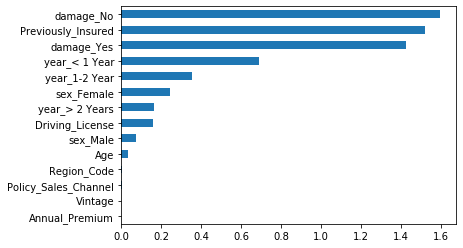

In [23]:
ordered_feature_imp=feature_importance.abs().sort_values()
ordered_feature_imp.plot.barh()

In [24]:

probs_train = clf.predict_proba(x_train)[:, 1]
probs_test = clf.predict_proba(x_test)[:, 1]

print(roc_auc_score(y_train, probs_train))
roc_auc_score(y_test, probs_test)

0.8293861744758726


0.8323185633988079

In [25]:

predict_prob=clf.predict_proba(test_data_f)[:,1]
predict_prob

array([0.00300224, 0.46455149, 0.26141329, ..., 0.00277503, 0.00256611,
       0.00452573])

In [26]:
submission=pd.DataFrame({'id':test_data['id'],'Response':predict_prob})
submission.head()

,id,Response
0,381110,0.003002
1,381111,0.464551
2,381112,0.261413
3,381113,0.050091
4,381114,0.002100


In [27]:
submission.to_csv('submission.csv',index=False)

# IMPROVED MODEL 0.0

In [28]:
## Using ensemble method to increase accuracy
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [29]:
model=GradientBoostingClassifier(n_estimators=150,max_depth=7)

# fit model with training data
model.fit(x_train,y_train)

probs_train = model.predict_proba(x_train)[:, 1]
probs_test = model.predict_proba(x_test)[:, 1]

print(roc_auc_score(y_train, probs_train))
roc_auc_score(y_test, probs_test)

0.8809614931690288


0.8583514250153452

In [30]:
predictions_en=model.predict_proba(test_data_f)[:,1]
submission_2=pd.DataFrame({'id':test_data['id'],'Response':predictions_en})
submission_2.head()

,id,Response
0,381110,0.000630
1,381111,0.320459
2,381112,0.304958
3,381113,0.007878
4,381114,0.000762


In [31]:
submission_2.to_csv('submission2.csv',index=False)